# Machine Learning Regression Model For House Price Prediction 

Date:Thursday, April 02, 2020\
Modified: N/A

    

### Step: 1  Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import time
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.6716461181640625e-05 seconds ---


In [2]:
#Reading the data
df_train = pd.read_csv('..../HousePricePrediction/train.csv')


In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#Problems with a sale price so we will try to find column related with "sale" 
filter_col = [col for col in df_train if col.lower().startswith('sale')]
print(filter_col)

['SaleType', 'SaleCondition', 'SalePrice']


In [5]:
# From observation we can say that targeted column should be SalePrice
# Lets check saleprice column
df_train.SalePrice.describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

--- 0.00011801719665527344 seconds ---


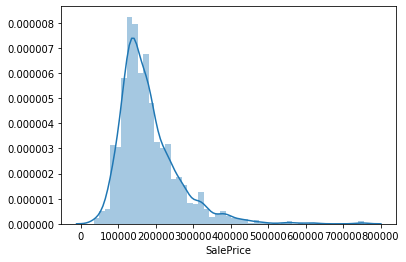

In [6]:
#histogram
sns.distplot(df_train['SalePrice']);

start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

### Skewness
Skewness is usually described as a measure of a dataset’s symmetry – or lack of symmetry.   A perfectly symmetrical data set will have a skewness of 0.   The normal distribution has a skewness of 0.


\begin{equation*}
\frac{\sum_{Ni=1} (Yi−\bar{y})^3}{NS^3}
\end{equation*}

   where $\bar{Y}$ is the mean\
       s is the standard deviation\
       N is the number of data points

In [7]:
#skewness
print("Skewness: %f" % df_train['SalePrice'].skew())

Skewness: 1.882876


So, when is the skewness too much?  The rule of thumb seems to be:

    If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
    If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
    If the skewness is less than -1 or greater than 1, the data are highly skewed


### Kurtosis
Kurtosis tells you virtually nothing about the shape of the peak – its only unambiguous interpretation is in terms of tail extremity


In [8]:
#kurtosis 
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Kurtosis: 6.536282


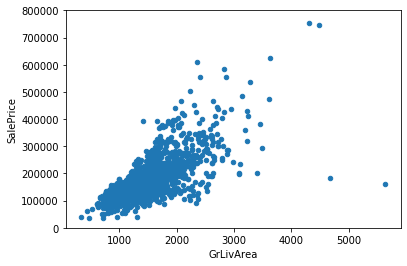

In [9]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


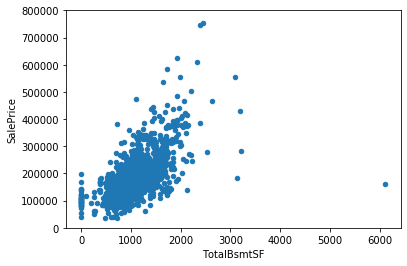

In [10]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

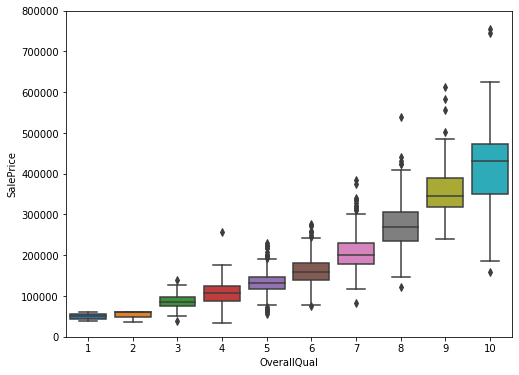

In [11]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

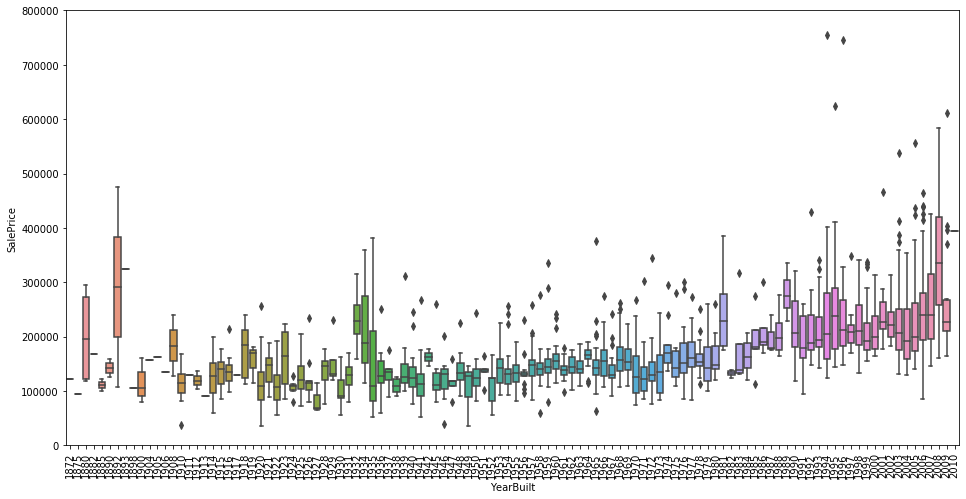

In [12]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

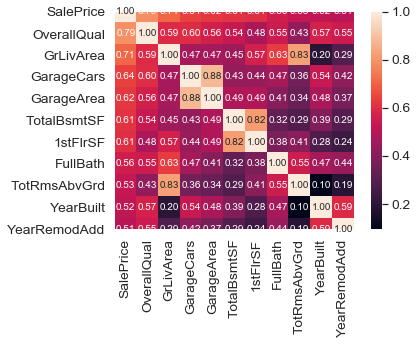

In [13]:
#correlation matrix
corrmat = df_train.corr()

#saleprice correlation matrix
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [14]:
print(cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


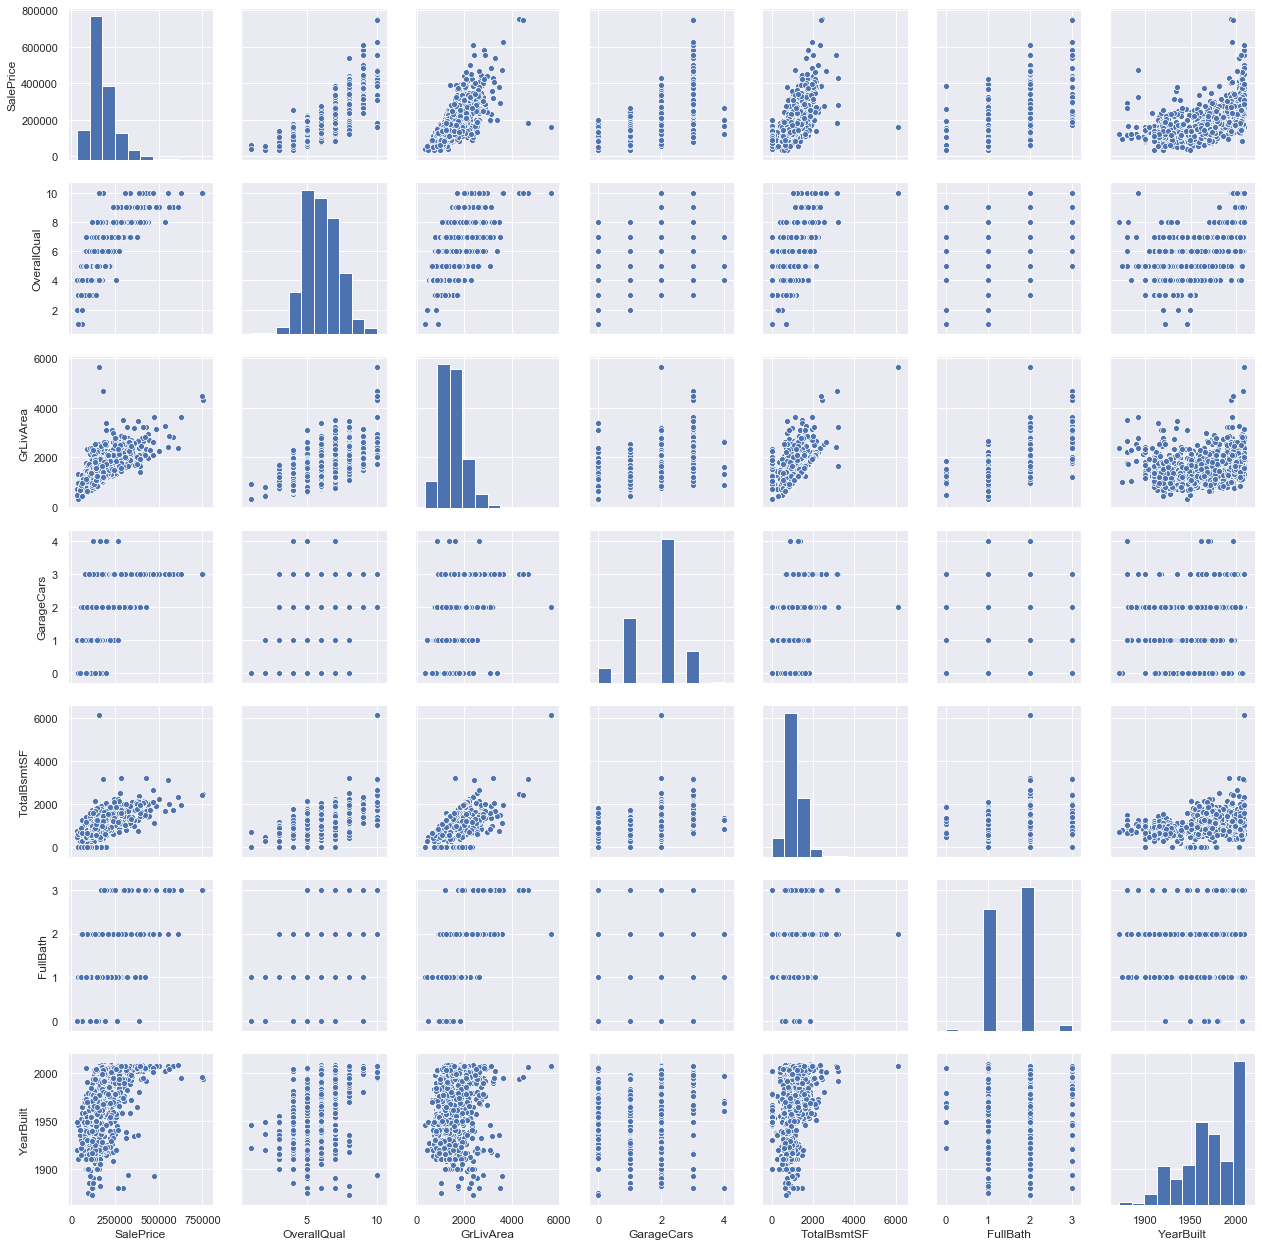

--- 11.449581146240234 seconds ---


In [15]:
#scatterplot

import time
start_time = time.time()

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();
print("--- %s seconds ---" % (time.time() - start_time))

In [16]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [17]:
#dealing with missing data
# df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
# df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
# df_train.isnull().sum().max() #just checking that there's no missing data missing...

Codereference: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python \
Citations:\
[1] skewness and kurtosis link: https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics